In [1]:
%matplotlib inline

In [2]:
from neural_semigroups.training_helpers import load_database_as_cubes

train, _, _, train_labels, _, _ = load_database_as_cubes(
    "databases/semigroup.3.npz", 224, 1
)

100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]


In [3]:
from neural_semigroups.cayley_database import CayleyDatabase

cayley_database = CayleyDatabase()
cayley_database.load_database("databases/semigroup.3.npz")
cayley_database.load_model("semigroups.3.model")

In [34]:
import torch

embeddings = cayley_database.model.hidden_layers(
    torch.from_numpy(train).view(-1, 27)
).detach().numpy()
embeddings.shape

(224, 2)

In [35]:
from sklearn.manifold import TSNE

tsne_embeddings = embeddings # TSNE().fit_transform(embeddings)

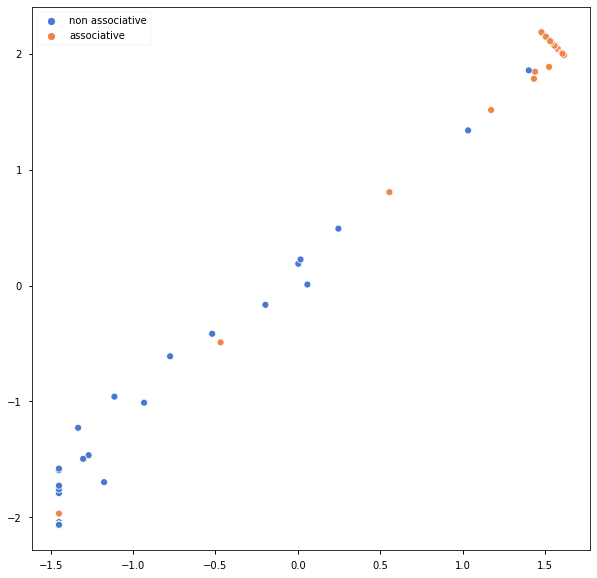

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.style.use(["seaborn-notebook"]) 
sns.scatterplot(
    x=tsne_embeddings[:, 0],
    y=tsne_embeddings[:, 1],
    hue=np.where(train_labels, "associative", "non associative"),
    palette=sns.color_palette("muted", n_colors=2)
)
plt.show()

In [37]:
cayley_database.load_smallsemi_database("smallsemi/data3.gl")

In [38]:
total_labels = len(cayley_database.database)
print(total_labels)

18


In [39]:
from neural_semigroups.magma import Magma
from neural_semigroups.utils import get_equivalent_magmas

labels = list()
augmented_tables = list()
for label, cayley_table in enumerate(cayley_database.database):
    for table in get_equivalent_magmas(cayley_table):
        augmented_tables.append(Magma(table).probabilistic_cube)
        labels.append(label)

In [40]:
embeddings = cayley_database.model.hidden_layers(
    torch.from_numpy(np.stack(augmented_tables)).view(-1, 27)
).detach().numpy()
embeddings.shape

(113, 2)

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=18).fit(embeddings)

In [42]:
kmeans.predict(embeddings)

array([ 1,  6, 10,  1,  4, 15, 15, 10, 17,  7, 11,  7,  7,  6,  6,  1, 10,
        9,  1,  6,  1, 10, 14, 10, 12,  1, 10,  1, 10, 14, 10, 11, 17, 14,
       16,  6, 10, 10,  1,  0, 10,  1,  1, 11, 13, 15,  1,  3, 14,  1,  5,
       10,  8, 17, 16, 15, 15, 14,  8, 15, 10,  1, 17, 14, 15,  8,  6, 10,
       14,  1, 14, 10, 17,  1, 15, 10, 12, 12, 11, 10, 14, 10, 15, 15, 15,
       15, 14, 14,  1,  6, 12, 12, 10,  8,  1,  8, 12,  8, 10, 14, 10,  8,
       10, 12,  8, 14,  6, 12, 10, 15,  2,  7,  7], dtype=int32)

In [43]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.001, min_samples=3).fit(embeddings)
clustering.labels_

array([ 0, -1,  1,  2, -1, -1,  3,  1,  4,  5, -1,  5,  5, -1, -1, -1,  6,
       -1, -1, -1, -1,  1, -1,  7, -1,  2,  1, -1, -1, -1,  1, -1,  4, -1,
       -1, -1,  8,  1,  0, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1,  2, -1,
        1, -1,  4, -1,  3, -1, -1, -1,  3,  6,  0,  4, -1,  3,  9, -1,  6,
       10, -1, -1,  7,  4,  2, -1,  7, -1, -1, -1,  6, -1, -1,  3, -1,  3,
        3, 10, 10, -1, -1, -1, -1, -1,  9, -1, -1, -1, -1, -1, -1,  8,  9,
        1, -1, -1, 10, -1, -1,  8,  3, -1,  5,  5])

In [17]:
np.array(labels)

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17])

In [18]:
tsne_embeddings = TSNE().fit_transform(embeddings)

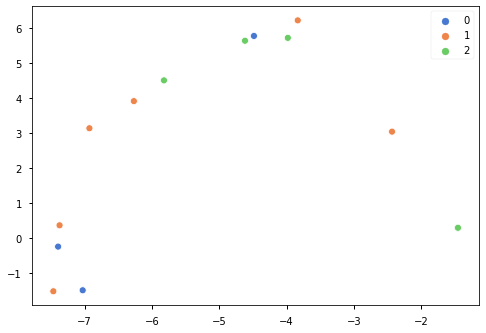

In [23]:
n = 15
palette = sns.color_palette(
    "muted",
    n_colors=np.unique(labels[:n]).shape[0]
)
sns.set_palette(palette)
sns.scatterplot(
    x=tsne_embeddings[:, 0][:n],
    y=tsne_embeddings[:, 1][:n],
    hue=labels[:n],
    palette=palette
)
plt.show()